# BUILD A CHILD GRID - AGRIF NESTING NOTEBOOK VERSION

<div class="alert alert-block alert-info">
    
**AGRIF (Adaptive Grid Refinement in Fortran)** is a Fortran 95 package for the inclusion of adaptive mesh refinement features within a finite difference numerical model. One of the major advantages of AGRIF in static-grid embedding is the ability to manage an arbitrary number of fixed grids and an arbitrary number of embedding levels.  

</div>

In [3]:
#MAGIC CELLS
#Allows widget interactivity with user
%matplotlib widget    
%load_ext autoreload
%autoreload 2

#LIBRARIES
import numpy as np
import os,sys
os.environ['ETS_TOOLKIT'] = 'wx'
sys.path.append("./Modules/")
sys.path.append("./Readers/")
sys.path.append("./Modules/graphicUI_tools/")

#----------------------------------------------#
from tools_make_grid import GetMask, GetTopo, topo_prt, Inputs_smth_c2c, Inputs_c2c
from croco_class import CROCO
from tools_grid_inputs import setup_widgets_agrif, prepare_variables
from tools_create_grids import create_child_grid_AGRIF
from tools_grid_edition import plot_outline_ax, plot_topo_bis

#----------------------------------------------#
from Modules.map_tools.map_tools import plot_grid
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from ipywidgets import FloatText, VBox, widgets, interact_manual
from IPython.display import display, clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✏️🔧 User's changes

In [43]:
# Call the setup_widgets function to display the widgets and get the function to retrieve saved values
get_saved_config = setup_widgets_agrif(parent_grid= True)

## 🧩🌐 Building the grid

In [51]:
# Get the config paramaters defined in the widgets + retain the ones useful for creating the grid
saved_config= get_saved_config()
variables= prepare_variables(saved_config)
#create the grid
chd_grid, inputs, prt= create_child_grid_AGRIF(**variables)

==> East limits displacement +1
==> East limits displacement +1
Reading topography file: ../../DATASETS_CROCOTOOLS/Topo/etopo2.nc
Single region dataset imin/imax= 5707 5992
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5707 5992 out of 10800 jmin,jmax = 1620 1826 out of 5400
Interpolating topography to CROCO grid

 Geographical extents of the dataset:
    Longitude min/max =   10.233334   19.733334
    Latitude  min/max =  -36.000000  -29.133333

 Geographical extents of requested ROMS grid:
    Longitude min/max =   10.289043   19.710957
    Latitude  min/max =  -35.945886  -29.175113

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2   285 out of   286 jsouth,jnorth =    2   205 out of   207

 Averaging window width = 2.00000 in grid spaces.

.Finished interpolating
...........

 Wall Clock time spent to compute hraw    0.01 sec running   1 threads.
Matching Parent and Child mask close to bou

## 👁️🌐 Grid display

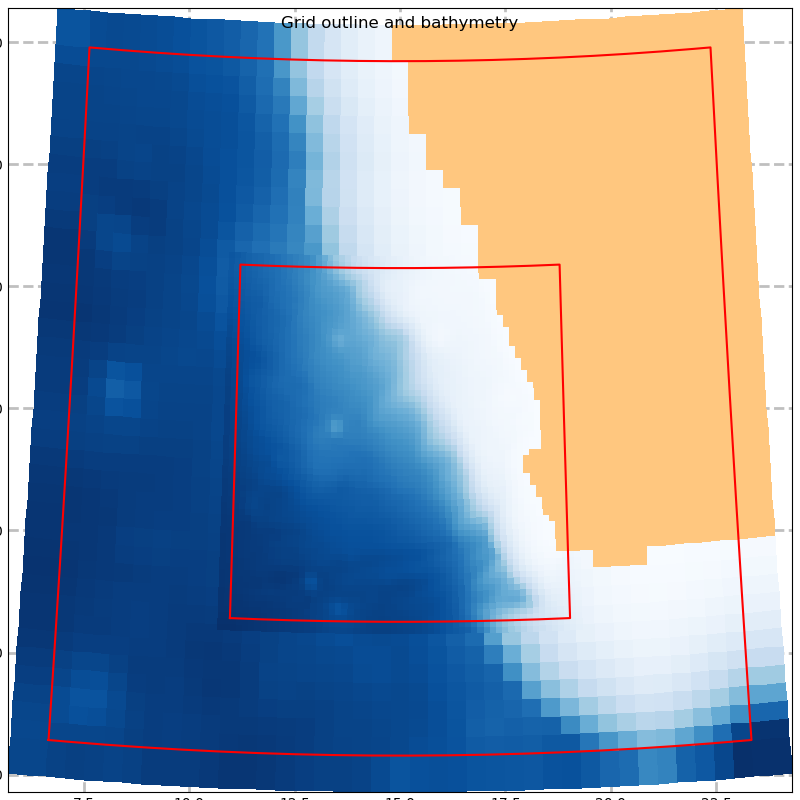

In [22]:
plt.style.use('_mpl-gallery')
figure2, ax2 = plt.subplots(figsize=(8, 8))
figure2.suptitle('Grid outline and bathymetry')
ax2 = plot_outline_ax(prt, ax2)
ax2, cb2 = plot_topo_bis(prt, figure2, ax2)
ax2 = plot_outline_ax(chd_grid, ax2)
ax2, cb2= plot_topo_bis(chd_grid, figure2, ax2)

### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook. Then it saves it in the ouput repertory.

In [21]:
prt_grd=['AGRIF',parent_grid,coef,imin,imax,jmin,jmax]
CROCO.create_grid_nc(None,saved_config['output_file'],inputs,chd_grid, prt_grd)

[autoreload of fiona.env failed: Traceback (most recent call last):
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/home/thibault-delahaye/micromamba/envs/croco_pyenv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: ca

AttributeError: 'Inputs_c2c' object has no attribute 'nx'